# Analysis Of NuclearPower tweets Dataset

Importing Libraries

In [45]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
nuclear=pd.read_csv('C:/Users/kgpr/OneDrive/Desktop/NuclearPower.csv',header=0,encoding = 'unicode_escape')

Shape of the dataset

In [15]:
nuclear.shape

(190, 2)

Sample of the Dataset

In [16]:
nuclear.head()

,tweet_text,sentiment
0,:Hello Japan is a nuclear power plant crisis. ...,Negative
1,. Renewable Energy Consumption Tops Nuclear fo...,Neutral
2,. Will liberals now seek to eliminate dangerou...,Neutral
3,"(Aug 22,2011)Plant Status of Fukushima Daiichi...",Neutral
4,[ebook] Nuclear Energy and the Environment: Ox...,Neutral


### Visualization

In [17]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

8.0
6.0


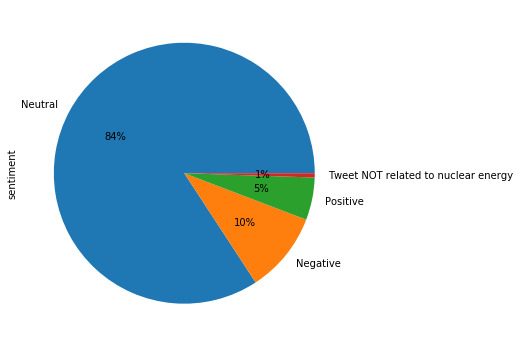

In [18]:
nuclear.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')

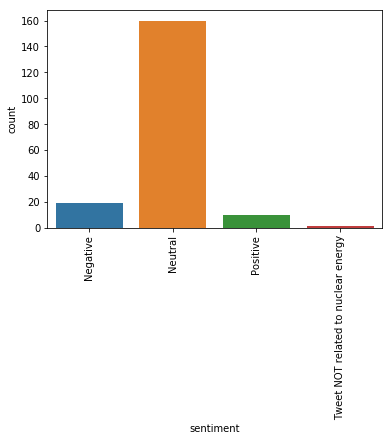

In [47]:
sns.countplot(nuclear['sentiment'])
plt.xticks(rotation=90)
plt.show()

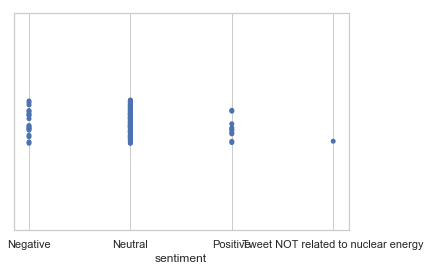

In [58]:
sns.set(style="whitegrid")
ax = sns.stripplot(x=nuclear["sentiment"])

Polarity and Subjectivity

In [52]:
from textblob import TextBlob
df=pd.DataFrame({'sentence':nuclear['tweet_text']})
df['polarity']=df.apply(lambda x:TextBlob(x['sentence']).sentiment.polarity,axis=1)
df['subjectivity']=df.apply(lambda x:TextBlob(x['sentence']).sentiment.subjectivity,axis=1)
print(df.head())

                                            sentence  polarity  subjectivity
0        hello japan nuclear power plant crisis link       0.0           0.0
1  renewable energy consumption top nuclear first...       0.5           0.5
2  liberal seek eliminate dangerous nuclear power...      -0.4           0.6
3  aug 222011plant status fukushima daiichi nucle...       0.0           0.0
4  ebook nuclear energy environment oxf ord un iv...       0.0           0.0


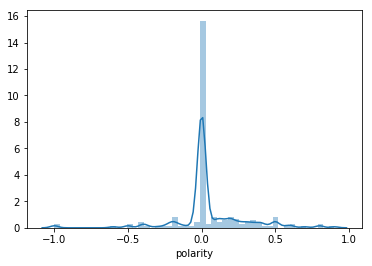

In [56]:
sns.distplot(df['polarity'])
plt.show()

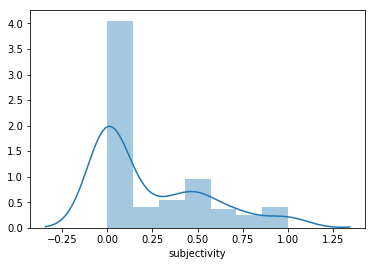

In [57]:
sns.distplot(df['subjectivity'])
plt.show()

### Basic Preprocessing

Checking No.of words

In [19]:
nuclear['word_count'] = nuclear['tweet_text'].apply(lambda x: len(str(x).split(" ")))
nuclear[['tweet_text','word_count']].head()


,tweet_text,word_count
0,:Hello Japan is a nuclear power plant crisis. ...,9
1,. Renewable Energy Consumption Tops Nuclear fo...,13
2,. Will liberals now seek to eliminate dangerou...,15
3,"(Aug 22,2011)Plant Status of Fukushima Daiichi...",18
4,[ebook] Nuclear Energy and the Environment: Ox...,23


Average Words Length

In [20]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

nuclear['avg_word'] = nuclear['tweet_text'].apply(lambda x: avg_word(x))
nuclear[['tweet_text','avg_word']].head()


,tweet_text,avg_word
0,:Hello Japan is a nuclear power plant crisis. ...,4.888889
1,. Renewable Energy Consumption Tops Nuclear fo...,6.153846
2,. Will liberals now seek to eliminate dangerou...,5.333333
3,"(Aug 22,2011)Plant Status of Fukushima Daiichi...",5.388889
4,[ebook] Nuclear Energy and the Environment: Ox...,4.347826


In [21]:
from nltk.corpus import stopwords

Stopwords Count

In [22]:
stop = stopwords.words('english')

nuclear['stopwords'] = nuclear['tweet_text'].apply(lambda x: len([x for x in x.split() if x in stop]))
nuclear[['tweet_text','stopwords']].head()

,tweet_text,stopwords
0,:Hello Japan is a nuclear power plant crisis. ...,2
1,. Renewable Energy Consumption Tops Nuclear fo...,2
2,. Will liberals now seek to eliminate dangerou...,2
3,"(Aug 22,2011)Plant Status of Fukushima Daiichi...",2
4,[ebook] Nuclear Energy and the Environment: Ox...,2


Special Characters

In [23]:
nuclear['hastags'] = nuclear['tweet_text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
nuclear[['tweet_text','hastags']].head()

,tweet_text,hastags
0,:Hello Japan is a nuclear power plant crisis. ...,0
1,. Renewable Energy Consumption Tops Nuclear fo...,0
2,. Will liberals now seek to eliminate dangerou...,0
3,"(Aug 22,2011)Plant Status of Fukushima Daiichi...",2
4,[ebook] Nuclear Energy and the Environment: Ox...,0


Numerics in Sentences

In [25]:
nuclear['numerics'] = nuclear['tweet_text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
nuclear[['tweet_text','numerics']].head()

,tweet_text,numerics
0,:Hello Japan is a nuclear power plant crisis. ...,0
1,. Renewable Energy Consumption Tops Nuclear fo...,0
2,. Will liberals now seek to eliminate dangerou...,0
3,"(Aug 22,2011)Plant Status of Fukushima Daiichi...",0
4,[ebook] Nuclear Energy and the Environment: Ox...,3


Uppercase Words Count

In [26]:
nuclear['upper'] = nuclear['tweet_text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
nuclear[['tweet_text','upper']].head()

,tweet_text,upper
0,:Hello Japan is a nuclear power plant crisis. ...,0
1,. Renewable Energy Consumption Tops Nuclear fo...,0
2,. Will liberals now seek to eliminate dangerou...,0
3,"(Aug 22,2011)Plant Status of Fukushima Daiichi...",0
4,[ebook] Nuclear Energy and the Environment: Ox...,2


Lowercase 

In [27]:
nuclear['tweet_text'] = nuclear['tweet_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
nuclear['tweet_text'].head()

0    :hello japan is a nuclear power plant crisis. ...
1    . renewable energy consumption tops nuclear fo...
2    . will liberals now seek to eliminate dangerou...
3    (aug 22,2011)plant status of fukushima daiichi...
4    [ebook] nuclear energy and the environment: ox...
Name: tweet_text, dtype: object

Remove Punctuation

In [28]:
nuclear['tweet_text'] = nuclear['tweet_text'].str.replace('[^\w\s]','')
nuclear['tweet_text'].head(30)

0      hello japan is a nuclear power plant crisis link
1      renewable energy consumption tops nuclear for...
2      will liberals now seek to eliminate dangerous...
3     aug 222011plant status of fukushima daiichi nu...
4     ebook nuclear energy and the environment oxf o...
5     gjobs nuclear power safety campaign organizer ...
6     news nuclear power plant radioactive tritium c...
7     science nuclear energy and the environment oxf...
8     link p how many windmills would you need to pr...
9     link quotthe right thing to doquot im for nucl...
10    link 6 min video masao yoshida of fukushima di...
11    link 74 percent favor gradual reduction of nuc...
12    link coal seen as possible alternative to nucl...
13    link experts are not sure of the economic side...
14    link five star_ enters nuclear power supply ma...
15    link five star_ enters nuclear power supply ma...
16    link health newspaper articles complete reject...
17    link india to accord highest safety standa

Stop Word Removal

In [29]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
nuclear['tweet_text'] = nuclear['tweet_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
nuclear['tweet_text'].head()

0          hello japan nuclear power plant crisis link
1    renewable energy consumption tops nuclear firs...
2    liberals seek eliminate dangerous nuclear powe...
3    aug 222011plant status fukushima daiichi nucle...
4    ebook nuclear energy environment oxf ord un iv...
Name: tweet_text, dtype: object

Frequency Count

In [30]:
freq = pd.Series(' '.join(nuclear['tweet_text']).split()).value_counts()[:10]
freq

nuclear      218
mention      197
rt           128
link         122
power        109
energy        88
plant         38
fukushima     21
plants        17
news          11
dtype: int64

### Word Cloud Generation

In [31]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

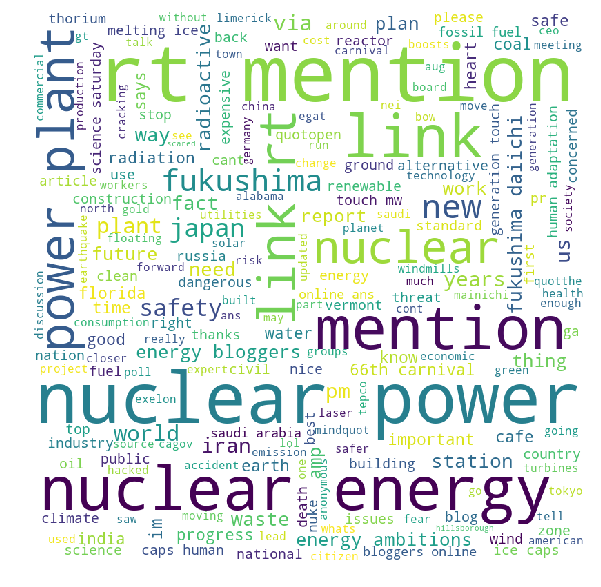

In [32]:
comment_words = ' '
stopwords = set(STOPWORDS) 

# iterate through the csv file 
for val in nuclear['tweet_text']:
    
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### NLP Preprocessing 

Stemming

In [34]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
nuclear['tweet_text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0           hello japan nuclear power plant crisi link
1    renew energi consumpt top nuclear firsttim lin...
2    liber seek elimin danger nuclear power plant l...
3    aug 222011plant statu fukushima daiichi nuclea...
4    ebook nuclear energi environ oxf ord un ivers ...
Name: tweet_text, dtype: object

Lemmatization

In [35]:
from textblob import Word
nuclear['tweet_text'] = nuclear['tweet_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
nuclear['tweet_text'].head()

0          hello japan nuclear power plant crisis link
1    renewable energy consumption top nuclear first...
2    liberal seek eliminate dangerous nuclear power...
3    aug 222011plant status fukushima daiichi nucle...
4    ebook nuclear energy environment oxf ord un iv...
Name: tweet_text, dtype: object

POS Tagging

In [60]:
import nltk 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize 
stop_words = set(stopwords.words('english')) 
tagged = nltk.pos_tag(nuclear['tweet_text']) 
print(tagged)

[('hello japan nuclear power plant crisis link', 'NN'), ('renewable energy consumption top nuclear firsttime link nuclear energy renewable', 'JJ'), ('liberal seek eliminate dangerous nuclear power plant link green energy news', 'NNS'), ('aug 222011plant status fukushima daiichi nuclear power station 300 pm aug 22 link tepco japan', 'VBP'), ('ebook nuclear energy environment oxf ord un iversity pr es 2011 isbn 0841225850 432 page p link', 'VBP'), ('gjobs nuclear power safety campaign organizer temporary union concerned scientist cambridge link', 'VBP'), ('news nuclear power plant radioactive tritium contamination vermont link nwo', 'JJ'), ('science nuclear energy environment oxf ord un iversity pr es 2011 isbn 0841225850 432 page link', 'NN'), ('link p many windmill would need produce much power one average nuclear power station windmill', 'FW'), ('link quotthe right thing doquot im nuclear energy done correctly plant built 1970s standard', 'RB'), ('link 6 min video masao yoshida fukush

Tokenizing

In [36]:
tokenized_reviews=nuclear['tweet_text'].apply(lambda x: x.split())
tokenized_reviews.head()

0    [hello, japan, nuclear, power, plant, crisis, ...
1    [renewable, energy, consumption, top, nuclear,...
2    [liberal, seek, eliminate, dangerous, nuclear,...
3    [aug, 222011plant, status, fukushima, daiichi,...
4    [ebook, nuclear, energy, environment, oxf, ord...
Name: tweet_text, dtype: object

Using CountVectoriser Library

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(nuclear['tweet_text']).toarray()

Using TfidVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform(nuclear['tweet_text']).toarray()

### Model Evaluation

1) Random Forest

In [70]:
from sklearn.model_selection import train_test_split
y=nuclear['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [72]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [73]:
y_pred = classifier.predict(X_test)

In [74]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 0  4  0]
 [ 0 32  0]
 [ 0  2  0]]
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         4
     Neutral       0.84      1.00      0.91        32
    Positive       0.00      0.00      0.00         2

   micro avg       0.84      0.84      0.84        38
   macro avg       0.28      0.33      0.30        38
weighted avg       0.71      0.84      0.77        38

0.8421052631578947


C:\Users\kgpr\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\kgpr\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\kgpr\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


2) Support Vector Machine

In [85]:
from sklearn.svm import SVC
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=0)
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train1, y_train1)

C:\Users\kgpr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [86]:
y_pred1 = svclassifier.predict(X_test1)

In [87]:
print(confusion_matrix(y_test1,y_pred1))
print(classification_report(y_test1,y_pred1))
print(accuracy_score(y_test1, y_pred1))

[[ 0  4  0]
 [ 0 32  0]
 [ 0  2  0]]
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         4
     Neutral       0.84      1.00      0.91        32
    Positive       0.00      0.00      0.00         2

   micro avg       0.84      0.84      0.84        38
   macro avg       0.28      0.33      0.30        38
weighted avg       0.71      0.84      0.77        38

0.8421052631578947


C:\Users\kgpr\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\kgpr\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\kgpr\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
